<a href="https://colab.research.google.com/github/akashking123-art/Ai-Health-Predictor-/blob/main/House_price_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTALL AND SETUP KAGGLE API

In [ ]:
!pip install --quiet kaggle

from google.colab import files
files.upload()  # Upload your kaggle.json file here

import os
import shutil
os.makedirs('/root/.kaggle', exist_ok=True)
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 600)

Saving kaggle.json to kaggle.json


# DOWNLOAD AND EXTRACT

In [ ]:
!kaggle datasets download yasserh/housing-prices-dataset
!unzip -o housing-prices-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
License(s): CC0-1.0
housing-prices-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  housing-prices-dataset.zip
  inflating: Housing.csv             


# LOAD DATA

In [ ]:
import pandas as pd
data = pd.read_csv('Housing.csv')

# EXPLORE DATA

In [ ]:
print("First 5 rows:")
print(data.head())

print("\nData Info:")
print(data.info())

print("\nMissing values per column:")
print(data.isnull().sum())

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
D

# PREPROCESS DATA

In [ ]:
# Convert categorical columns from yes/no to binary 1/0
for col in ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]:
    data[col] = data[col].map({'yes': 1, 'no': 0})

# Furnishing status: one-hot encode
if 'furnishingstatus' in data.columns:
    data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

# Drop rows with missing values (simple approach)
# data = data.dropna() # No missing values according to previous output.

# FEATURES AND TARGET

In [ ]:
X = data.drop('price', axis=1)
y = data['price']

# TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TRAIN MODEL

In [22]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# EVALUATE MODEL

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np # Import numpy for sqrt
y_pred = model.predict(X_test)

print(f"\nModel Performance on Test Data:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):,.0f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):,.0f}") # Calculate RMSE manually
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


Model Performance on Test Data:
Mean Absolute Error (MAE): 1,118,483
Root Mean Squared Error (RMSE): 1,583,008
R² Score: 0.50


# FEATURE IMPORTANT

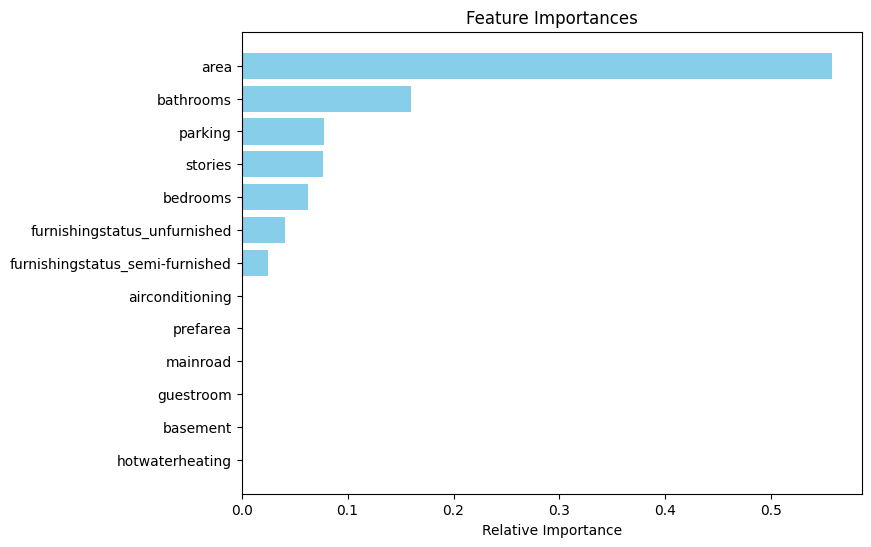

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel('Relative Importance')
plt.show()